In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

%matplotlib inline 


In [3]:
df = pd.read_csv('../data/raw/UCI_Credit_Card.csv')
df.sample(5)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
27496,27497,50000.0,1,1,1,48,0,0,0,0,...,25869.0,22647.0,2875.0,2300.0,2000.0,1600.0,100.0,250.0,104.0,0
15206,15207,70000.0,2,3,2,29,0,-1,-1,2,...,24726.0,25377.0,24818.0,24336.0,3010.0,0.0,875.0,600.0,1000.0,0
6657,6658,20000.0,2,2,2,26,2,2,0,0,...,17419.0,17628.0,18125.0,0.0,1281.0,771.0,640.0,790.0,761.0,0
11275,11276,60000.0,1,1,2,29,0,0,0,0,...,47728.0,48617.0,49669.0,2000.0,3600.0,3700.0,1800.0,2000.0,0.0,0
14854,14855,50000.0,1,2,2,43,0,0,0,-2,...,0.0,0.0,0.0,3505.0,0.0,0.0,0.0,0.0,0.0,0


## Dataset Features Description

This dataset contains the following 25 variables:

1. **ID**: Unique identifier for each client.
2. **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit).
3. **SEX**: Gender  
   - 1 = Male  
   - 2 = Female
4. **EDUCATION**: Education level  
   - 1 = Graduate school  
   - 2 = University  
   - 3 = High school  
   - 4 = Others  
   - 5 = Unknown  
   - 6 = Unknown
5. **MARRIAGE**: Marital status  
   - 1 = Married  
   - 2 = Single  
   - 3 = Others
6. **AGE**: Age in years.
7. **PAY_0**: Repayment status in September 2005  
   *(−1 = Pay duly, 1 = Delay for 1 month, ..., 9 = Delay for 9 months or more)*
8. **PAY_2**: Repayment status in August 2005 *(same scale as PAY_0)*
9. **PAY_3**: Repayment status in July 2005 *(same scale as PAY_0)*
10. **PAY_4**: Repayment status in June 2005 *(same scale as PAY_0)*
11. **PAY_5**: Repayment status in May 2005 *(same scale as PAY_0)*
12. **PAY_6**: Repayment status in April 2005 *(same scale as PAY_0)*
13. **BILL_AMT1**: Amount of bill statement in September 2005 (NT dollar)
14. **BILL_AMT2**: Amount of bill statement in August 2005 (NT dollar)
15. **BILL_AMT3**: Amount of bill statement in July 2005 (NT dollar)
16. **BILL_AMT4**: Amount of bill statement in June 2005 (NT dollar)
17. **BILL_AMT5**: Amount of bill statement in May 2005 (NT dollar)
18. **BILL_AMT6**: Amount of bill statement in April 2005 (NT dollar)
19. **PAY_AMT1**: Amount of previous payment in September 2005 (NT dollar)
20. **PAY_AMT2**: Amount of previous payment in August 2005 (NT dollar)
21. **PAY_AMT3**: Amount of previous payment in July 2005 (NT dollar)
22. **PAY_AMT4**: Amount of previous payment in June 2005 (NT dollar)
23. **PAY_AMT5**: Amount of previous payment in May 2005 (NT dollar)
24. **PAY_AMT6**: Amount of previous payment in April 2005 (NT dollar)
25. **default.payment.next.month**: Default payment next month  
    - 1 = Yes  
    - 0 = No


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
# Categorical variables description
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()


,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


No missing data, but a few anomalous things:

EDUCATION has category 5 and 6 that are unlabelled,  the category 0 is undocumented.
MARRIAGE has a label 0 that is undocumented


In [6]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()


,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


1) undocumented values like -2 
2) 0 should be marked as duely paid

In [7]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


we have to find what do the negetive vaulues indicate

In [8]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [9]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [10]:
df = df.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()
#  convert categorical variables to category type


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
probDefault = df['def_pay'].value_counts(normalize=True)
print(probDefault)

def_pay
0    0.7788
1    0.2212
Name: proportion, dtype: float64


we have unbalanced classes which need to be handles later

In [12]:
df.SEX.value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [13]:
df['MARRIAGE'].value_counts()


MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

0 type in undocumented

<Axes: ylabel='EDUCATION'>

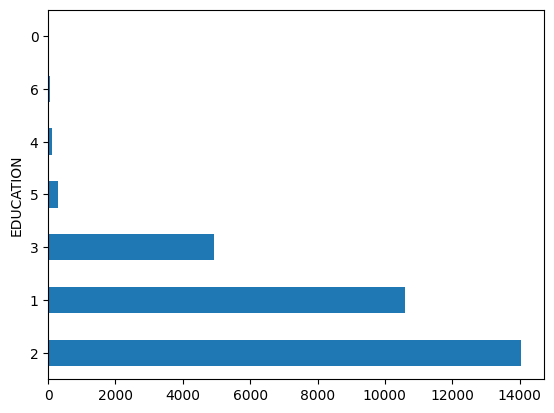

In [14]:
df.EDUCATION.value_counts().plot(kind = 'barh')

<Axes: ylabel='MARRIAGE'>

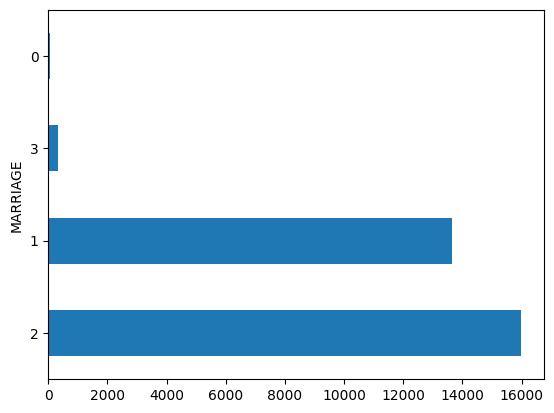

In [15]:
df['MARRIAGE'].value_counts().plot(kind = 'barh')


In [16]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


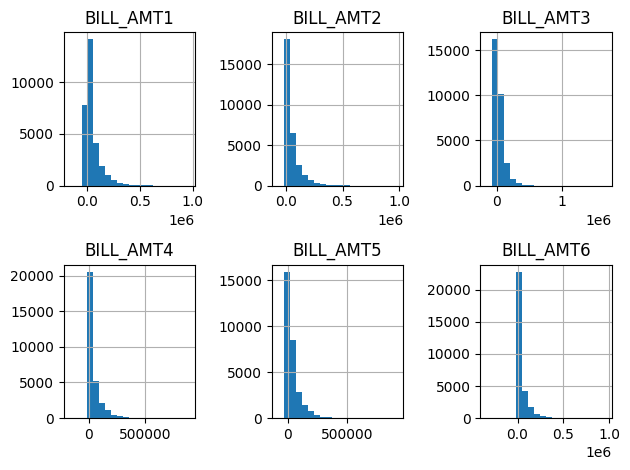

In [17]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)


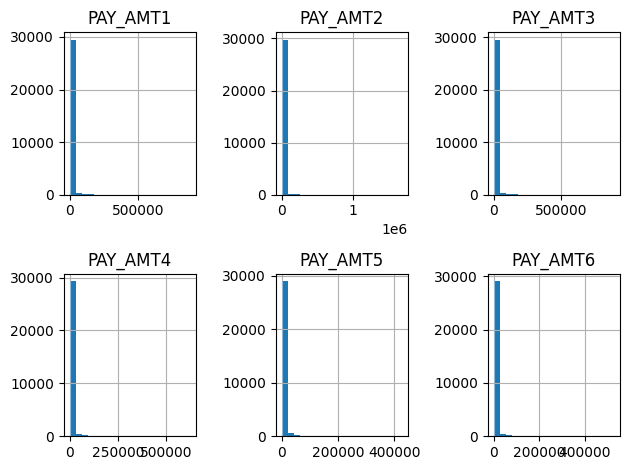

In [18]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)


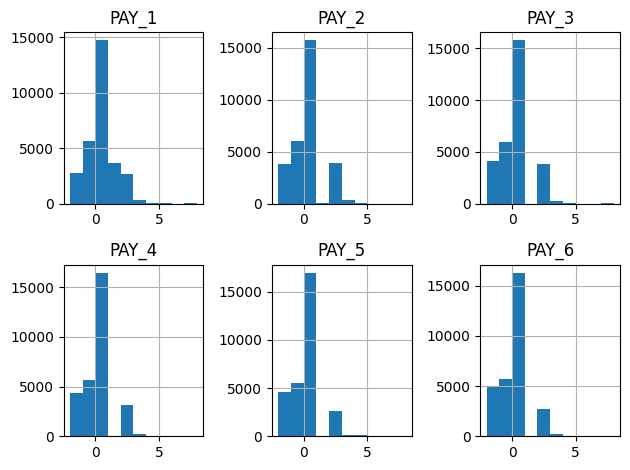

In [19]:
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

#this is probably more of a category


<Axes: >

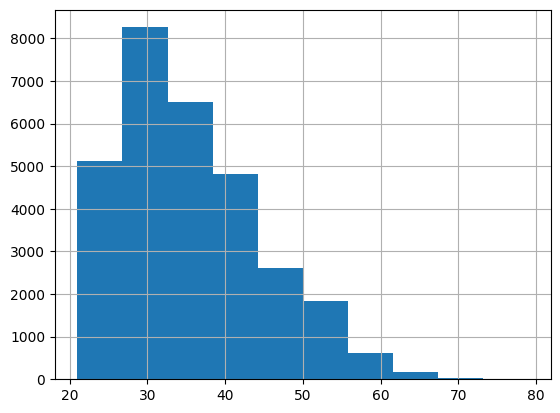

In [20]:
df.AGE.hist()


<Axes: >

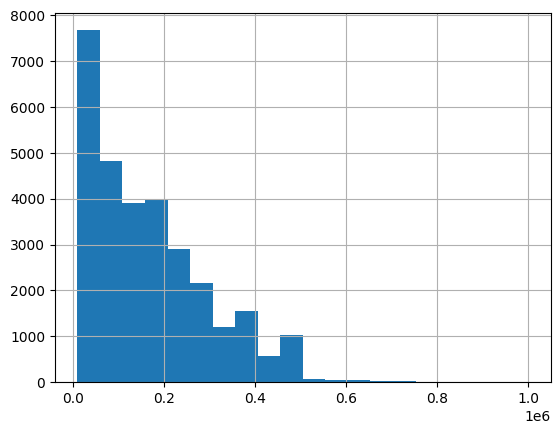

In [21]:
df.LIMIT_BAL.hist(bins = 20)


# DATA CLEANING


The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

In [22]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [23]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()


MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

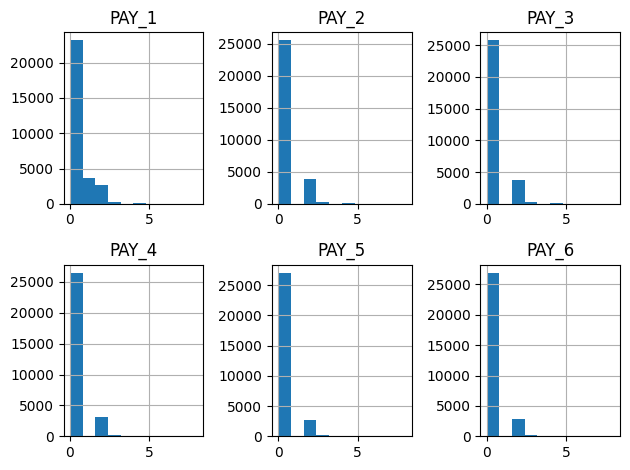

In [24]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)


correlation analysis

In [40]:

def corr_2_cols(Col1, Col2, df):
    # Cross-tabulate
    res = df.groupby([Col1, Col2]).size().unstack(fill_value=0)
    
    # Plot bar chart
    res.plot(kind='bar', stacked=True)
    plt.title(f'{Col1} vs {Col2}')
    plt.xlabel(Col1)
    plt.ylabel('Count')
    plt.legend(title=Col2)
    plt.tight_layout()
    plt.show()
    
    # Percentage of Col2 == 1 for each Col1
    if 1 in res.columns:
        percent_col2_1 = (res[1] / res.sum(axis=1)) * 100
    else:
        percent_col2_1 = pd.Series(0, index=res.index)  # If 1 is not present

    return percent_col2_1



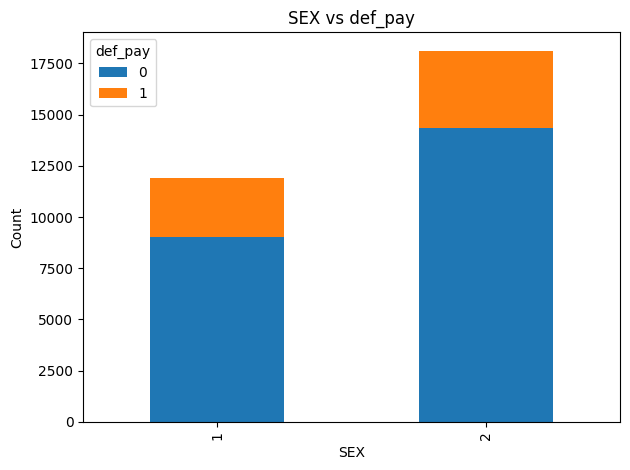

SEX
1    24.167227
2    20.776281
dtype: float64

In [41]:
corr_2_cols("SEX" , "def_pay",df)

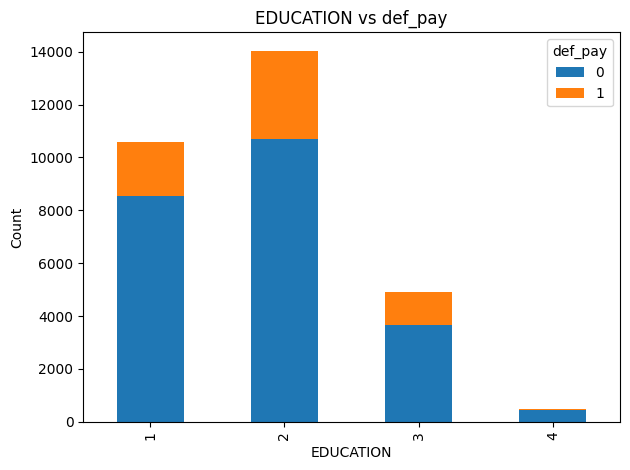

EDUCATION
1    19.234766
2    23.734854
3    25.157616
4     7.051282
dtype: float64

In [42]:
corr_2_cols("EDUCATION" , "def_pay",df)

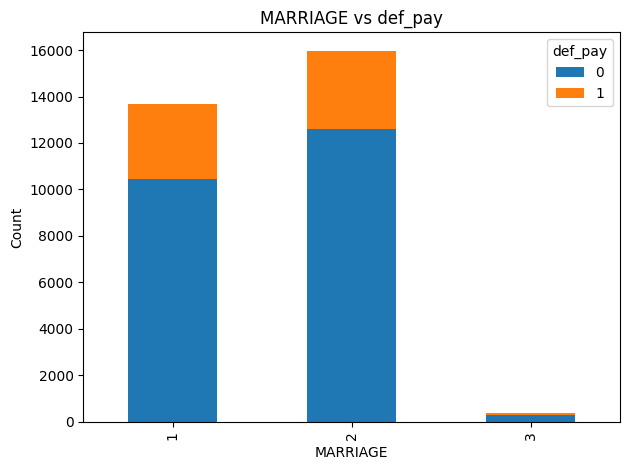

MARRIAGE
1    23.471704
2    20.928339
3    23.607427
dtype: float64

In [ ]:
corr_2_cols("MARRIAGE" , "def_pay",df)

1)  there are significantly more women than men
    men are most likely going to default the next month
2)  It seems that the higher is the education, the lower is the probability of defaulting the next month. Only exception is for the category labeled "Other" 
3) married people are most likely to default as well as the misterious category "Other" ( which is again numerically less relevant than the others)



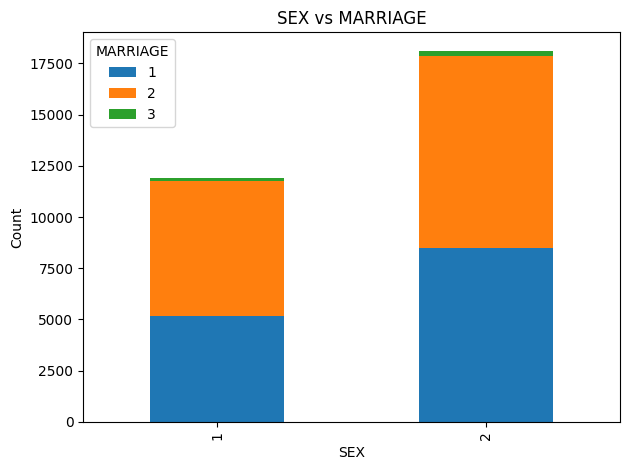

SEX
1    43.657470
2    46.759055
dtype: float64

In [46]:
corr_2_cols('SEX', 'MARRIAGE' , df)
